In [1]:

import numpy as np
import matplotlib.pyplot as plt

from pyPeriodicTrendDecomposition import PeriodicTrendDecomposition

(516,)
train: 235 test: 36


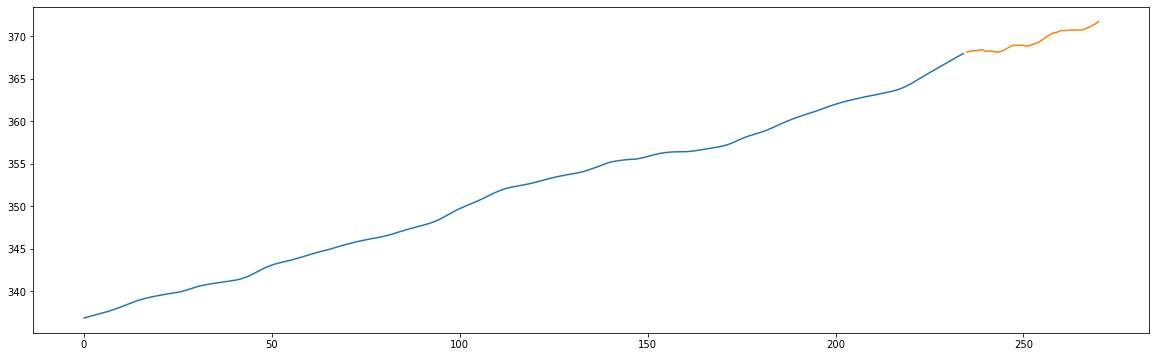

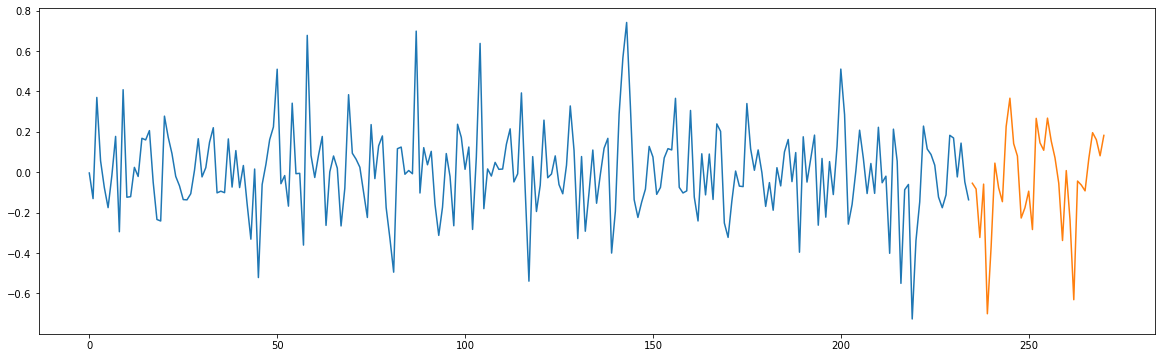

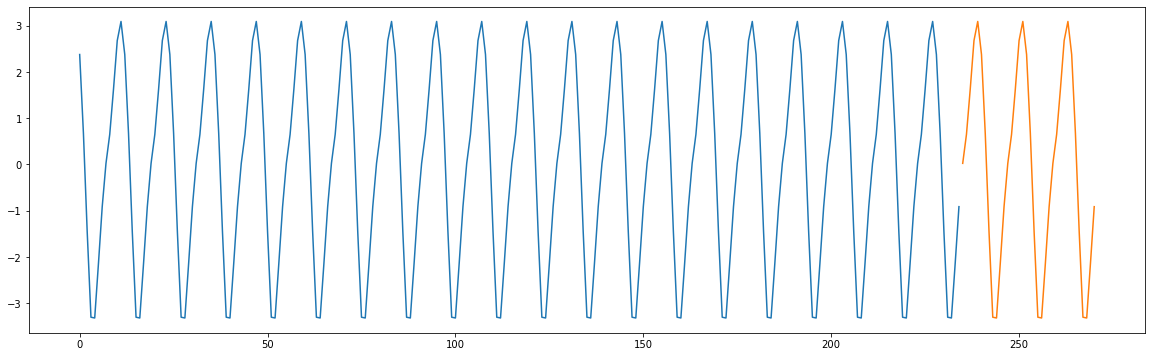

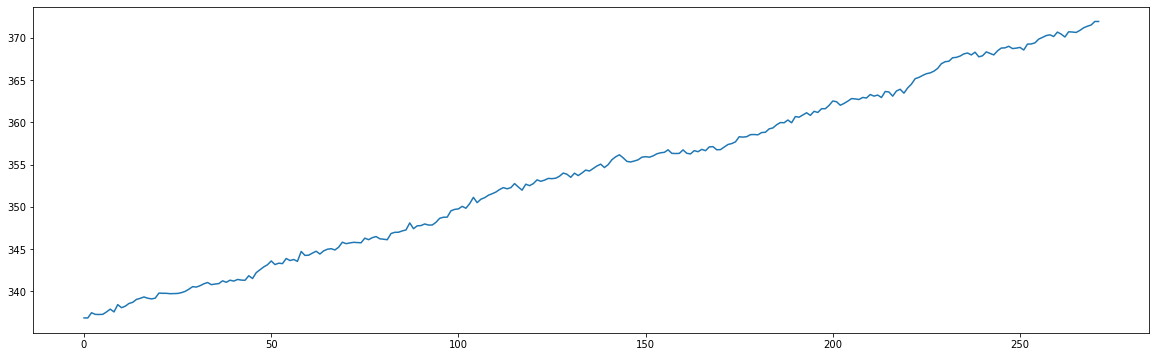

In [2]:
from statsmodels.datasets import co2
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
data = co2.load(True).data
data = data.resample('M').mean().ffill()
data = data.values.flatten()[10:]
print(data.shape)


train = data[12*20+5:-12*3]
test  = data[-12*3:]

print('train:', train.shape[0], 'test:', test.shape[0])

ptd = PeriodicTrendDecomposition(period_length=12, k1=12, k2=12, k3=12, n_inner=5, n_outer=5, season_norm=True, robust=True)
t1, p1, r1 = ptd.decompose(list(train))
t2, p2, r2 = ptd.outofsampelDecompose(test)

plt.figure('trend', figsize=(20, 6))
plt.plot(range(len(t1)), t1)
plt.plot(range(len(t1), len(t1)+len(t2)), t2)
# plt.plot(periodic)

plt.figure('remainder', figsize=(20, 6))
plt.plot(range(len(t1)), r1)
plt.plot(range(len(t1), len(t1)+len(t2)), r2)

plt.figure('periodic', figsize=(20, 6))
plt.scat(range(len(t1)), p1)
plt.plot(range(len(t1), len(t1)+len(t2)), p2)

plt.figure('S_t_deason', figsize=(20, 6))
plt.plot(ptd.S_t_deseason)